In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import misc
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import cv2
from bell2014.solver import IntrinsicSolver
from bell2014.input import IntrinsicInput
from bell2014.params import IntrinsicParameters
from bell2014 import image_util
K.set_image_dim_ordering('th')
%matplotlib nbagg

In [2]:
# Set python path here
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np
import caffe
import direct_intrinsics as di

ImportError: No module named direct_intrinsics

In [3]:
plt.figure()
plt.imshow(misc.imread('/media/drc/DATA/dataset/test/synth/train/synthdepth_1_0000001.png'))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


IOError: [Errno 2] No such file or directory: '/media/drc/DATA/dataset/test/synth/train/synthdepth_1_0000001.png'

0000000047_depth_real_A.png


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


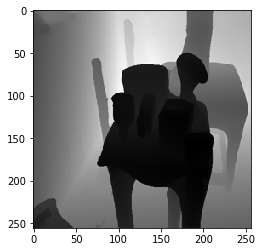

In [4]:
path ='/home/drc/Chris/pytorch-CycleGAN-and-pix2pix/results/depth_AtoB_lambdaB_pix2pix/test_latest/images/'
choice=np.random.choice(os.listdir(path))

print choice
plt.figure()
plt.imshow(misc.imread(path+choice))

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [9]:
decomposition.intensities

array([0.03082673, 0.03181557, 0.02803842, ..., 0.03264599, 0.03541175,
       0.03510434])

<IPython.core.display.Javascript object>


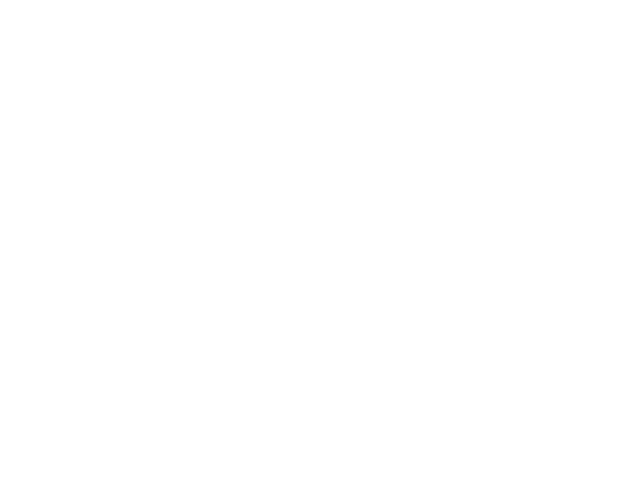

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


<IPython.core.display.Javascript object>


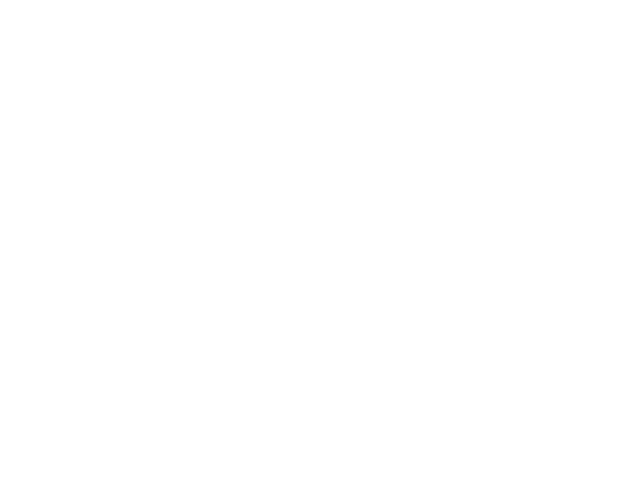

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


<IPython.core.display.Javascript object>


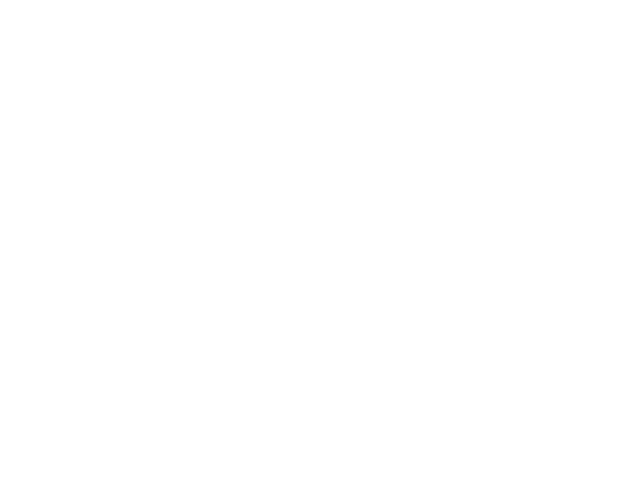

<IPython.core.display.Javascript object>


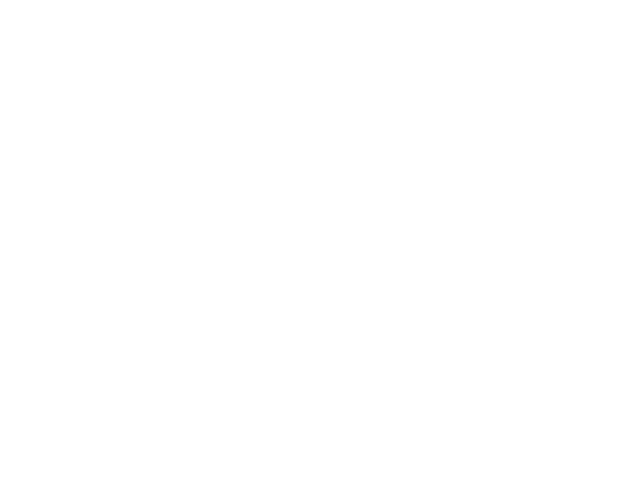

In [29]:
p=np.random.randint(1000)
np.random.seed(p)
path = "/media/drc/DATA/NYU/bathroom_0001/depth/"
plt.figure()
choice=np.random.choice(os.listdir(path))
plt.imshow(misc.imread(path+choice))
np.random.seed(p)
path2 = "/media/drc/DATA/NYU/bathroom_0001/rgb/"
choice2= np.random.choice(os.listdir(path2))
plt.figure()
plt.imshow(misc.imread(path2+choice2))

input = IntrinsicInput.from_file(path2+choice2)
solver = IntrinsicSolver(input,IntrinsicParameters())
r, s, decomposition = solver.solve()
plt.figure()
plt.imshow(rgb2gray(r))
plt.figure()
plt.imshow(s)


In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 480, 640), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [161]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path = "/media/drc/DATA/chris_labelfusion/CORL2017/object_database/gtdepth/"
fil = path+np.random.choice(os.listdir(path))
img = cv2.imread(fil,0)
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
edges = cv2.Canny(img,1,2)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

error: /io/opencv/modules/imgproc/src/canny.cpp:930: error: (-215) _src.depth() == 0 in function Canny


<IPython.core.display.Javascript object>


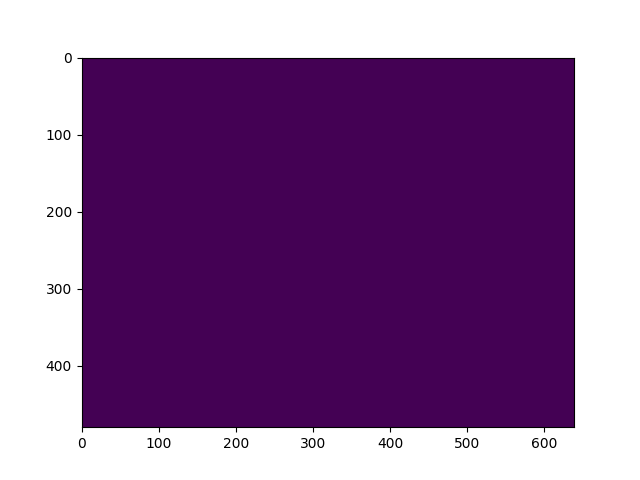

In [143]:
path = "/media/drc/DATA/chris_labelfusion/CORL2017/object_database/gtdepth/"
gray = img_as_float(io.imread(path+np.random.choice(os.listdir(path))))
image = skimage.filter.gaussian_filter(gray,sigma=7)
image = skimage.filter.canny(image,sigma=.001)
plt.imshow(image)

<IPython.core.display.Javascript object>


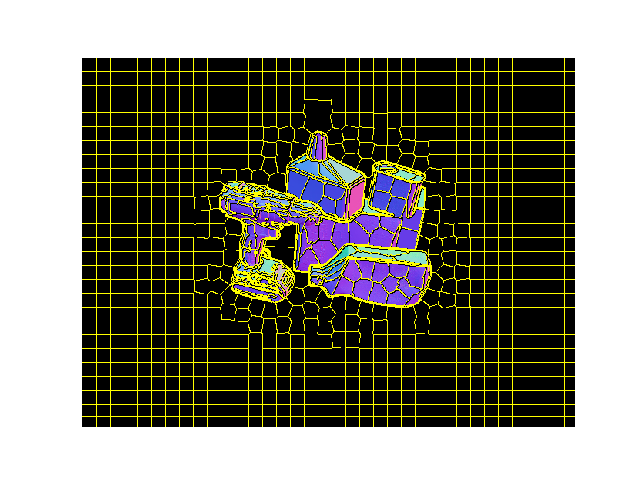

<IPython.core.display.Javascript object>


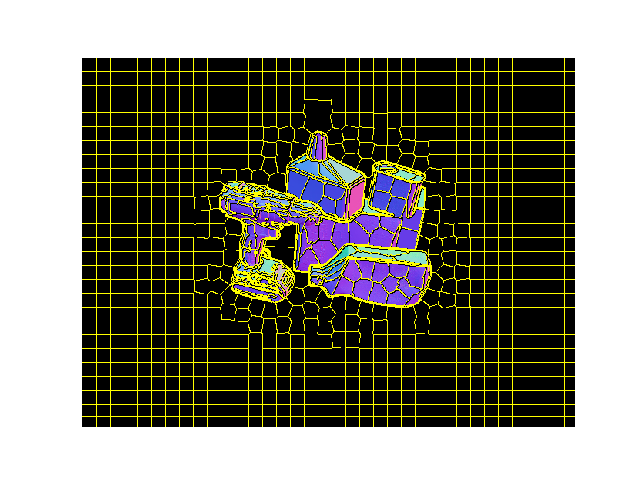

<IPython.core.display.Javascript object>


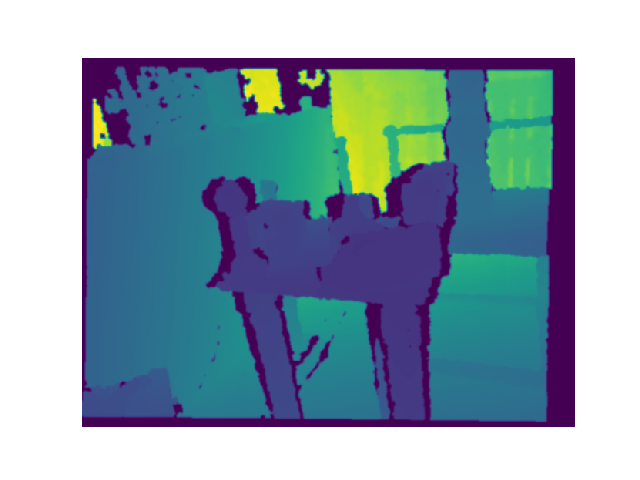

In [105]:
# import the necessary packages
from skimage.segmentation import slic
import skimage.segmentation as seg
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

path = "/media/drc/DATA/chris_labelfusion/CORL2017/object_database/normal/"
gray = img_as_float(io.imread(path+np.random.choice(os.listdir(path))))
#gray = gray/float(np.max(gray))*255.
#image = np.dstack([gray, gray, gray])
#print "loaded"

# loop over the number of segments
for numSegments in (1000, 200, 300):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    #segments = seg.random_walker(gray)
    segments = slic(gray,sigma= 1,n_segments=1000, multichannel=True,compactness=10)
 
    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(gray, segments))
    plt.axis("off")
plt.show()

In [119]:
def plot_hist(path,num):
        params = np.linspace(0,1,100)
        data = dict.fromkeys(params,0)
        data_tot = dict.fromkeys(params,0)
        for j in os.listdir(path):
            scene = path+j
            if os.path.exists(scene+"/depth/"):# and "bathroom" in scene:
                d_files = os.listdir(scene+"/depth/")
                c_files = os.listdir(scene+"/rgb/")
                d_files.sort()
                c_files.sort()
                a = np.arange(min(len(d_files),len(c_files)))
                np.random.shuffle(a)
                for i in a[:num]:
                    d= misc.imread(scene+"/depth/"+d_files[i])
                    c= misc.imread(scene+"/rgb/"+c_files[i])
                    print scene+"/depth/"+d_files[i]
                    if not os.path.isfile(scene+"/rgb/s_"+c_files[i]):
                        input = IntrinsicInput.from_file(scene+"/rgb/"+c_files[i])
                        solver = IntrinsicSolver(input,IntrinsicParameters())
                        r, s, decomposition = solver.solve()
                        misc.imsave(scene+"/rgb/s_"+c_files[i],s)
                        misc.imsave(scene+"/rgb/r_"+c_files[i],r)
                    else:
                        s = misc.imread(scene+"/rgb/s_"+c_files[i])
                        r = misc.imread(scene+"/rgb/r_"+c_files[i])
                        print "loading r and s"

                    r = rgb2gray(r)
                    non_zeros = np.argwhere(np.logical_and(d[100:400,100:600]<65000, d[100:400,100:600]>0))
                    zeros = np.argwhere(np.logical_or(d[100:400,100:600]>65000, d[100:400,100:600]==0))
                    z = r[zeros[:,0],zeros[:,1]]
                    nz = r[non_zeros[:,0],non_zeros[:,1]]
                                    
                    for k in z:
                        data_tot[params[(np.abs(params-k)).argmin()]]+=1
                        data[params[(np.abs(params-k)).argmin()]]+=1

                    for k in nz:
                        data_tot[params[(np.abs(params-k)).argmin()]]+=1

        return data,data_tot
data1,data_tot1 = plot_hist("/media/drc/DATA/Redwood/",10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


/media/drc/DATA/Redwood/car/depth/0001757-000058596403.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


/media/drc/DATA/Redwood/car/depth/0002832-000094468347.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0003192-000106481277.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0000284-000009443498.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0002614-000087193850.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0004333-000144555591.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0002795-000093233684.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0004043-000134878508.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0006484-000216332848.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/car/depth/0005498-000183430767.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0001369-000045649134.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0000067-000002202371.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0000325-000010811637.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0000231-000007674928.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0001264-000042145363.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0001392-000046416627.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0000506-000016851472.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0002018-000067305778.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0001016-000033869789.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


/media/drc/DATA/Redwood/trash_can/depth/0001230-000041010809.png


/usr/lib/python2.7/dist-packages/skimage/measure/_label.py:4: skimage_deprecation: Call to deprecated function ``label``. Use ``skimage.measure.label`` instead.
  return _label(input, neighbors, background, return_num)


<IPython.core.display.Javascript object>


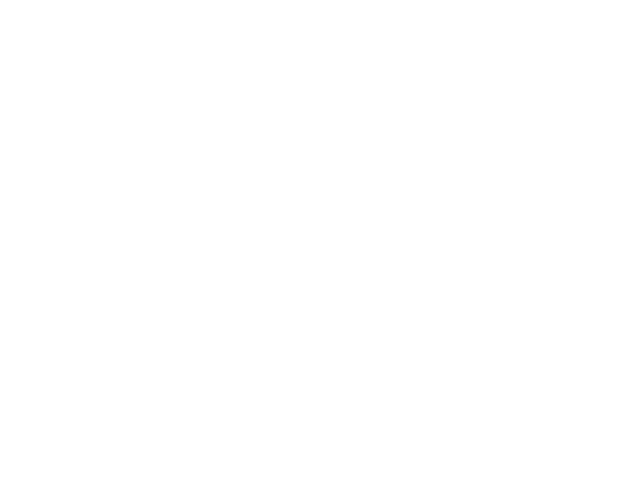

Text(0.5,1,u'Open Surface Albedo Dropout')

In [123]:
plt.figure()
plt.bar(data1.keys(),data1.values(),width=.01)ester of 6.UAR! Our first communication recitation is this Thursday, 2/15 4-5pm in 34-302, the same room as last fall. You'll need to bring a research article/journal paper in your field--idea from a journal that might publish your work. You may get more out of the activity if you've read the paper, but it's not essential.

plt.xlabel('Albedo Readings')
plt.ylabel('Number of dropout pixels')
plt.title('Open Surface Albedo Dropout')

<IPython.core.display.Javascript object>


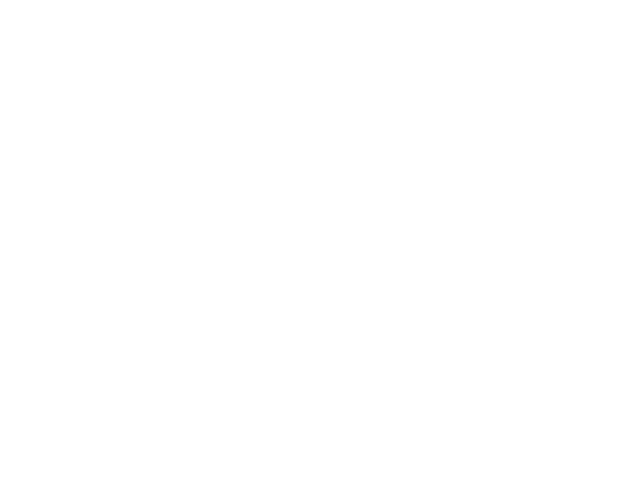

Text(0.5,1,u'Open Surface dropout distribution')

In [124]:
plt.figure()
plt.bar(data_tot1.keys(),data_tot1.values(),width=.01) 
plt.xlabel('Albedo Readings')
plt.ylabel('Number of pixels')
plt.title('Open Surface dropout distribution')

<IPython.core.display.Javascript object>


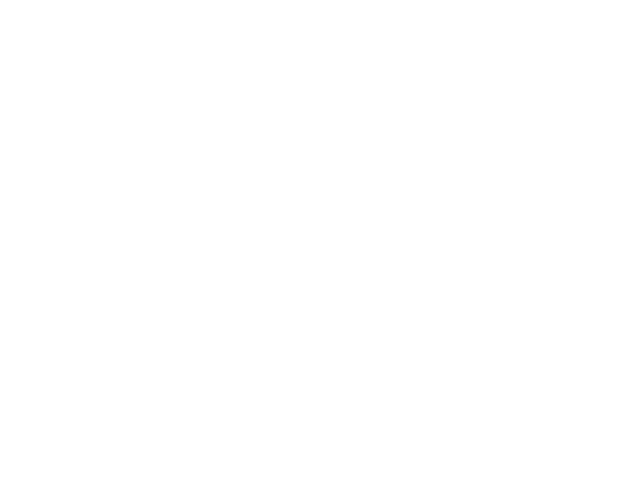

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


Text(0.5,1,u'Open Surface Albedo Ability to Predict Dropout')

In [125]:
plt.figure()
plt.bar(data1.keys(),np.array(data1.values())/(np.array(data_tot1.values())).astype(np.float),width=.01)
plt.xlabel('Albedo Readings')
plt.ylabel('Fraction of pixels predicted to be dropout')
plt.title('Open Surface Albedo Ability to Predict Dropout')